# 배추 객체 추출 관련 이미지 프로세싱 정리

## Mask-RCNN을 활용한 배추 객체 영역 추출


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

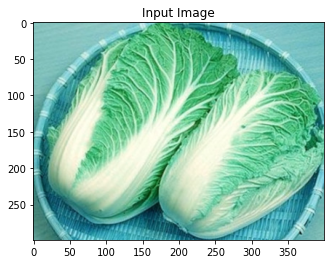

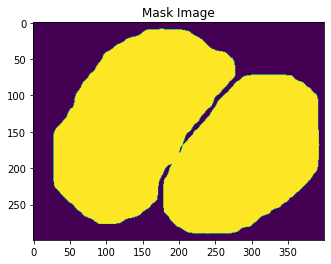

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/81.jpg, 338 x 224


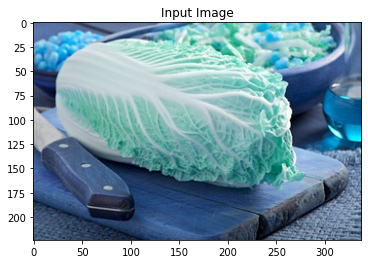

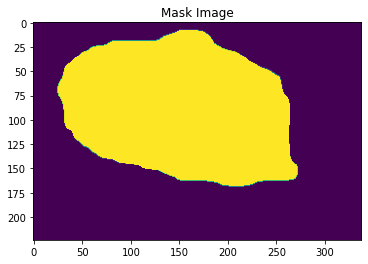

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/173.jpg, 900 x 900


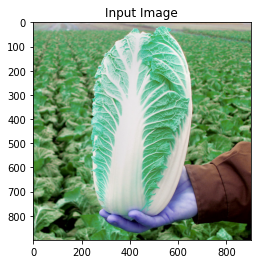

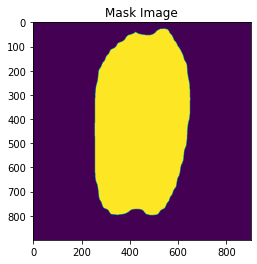

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/176.jpg, 735 x 551


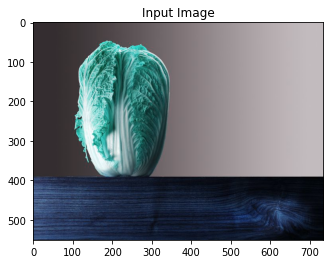

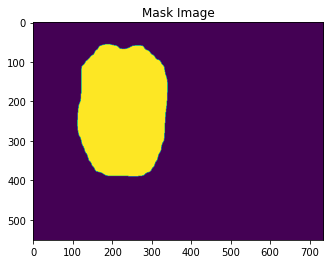

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/170.jpg, 1024 x 683


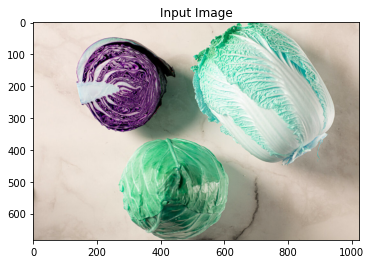

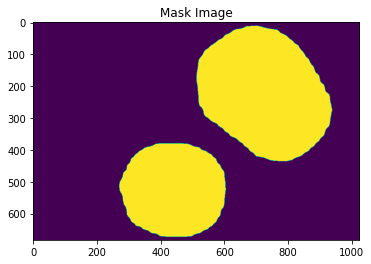

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/80.jpg, 626 x 415


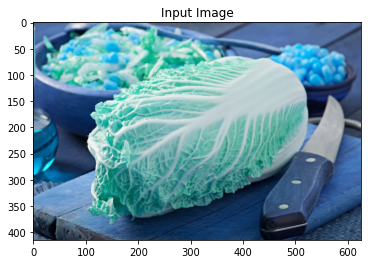

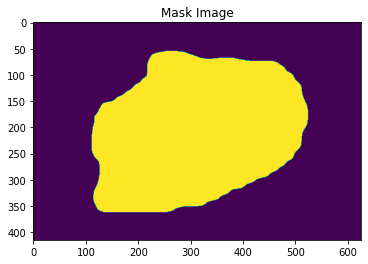

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/78.jpg, 626 x 340


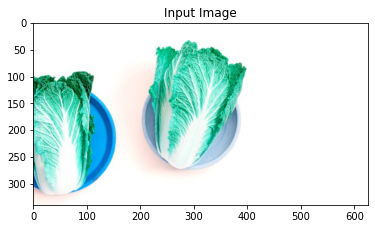

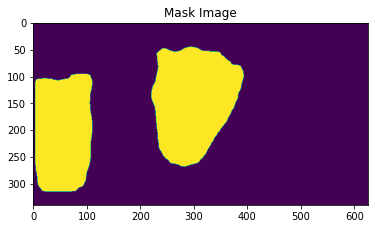

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/89.jpg, 225 x 338


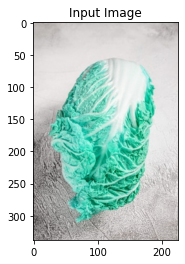

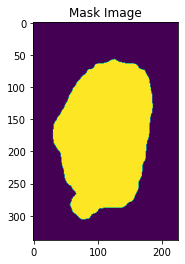

input image: /home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/19.jpg, 400 x 455


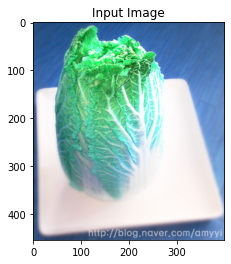

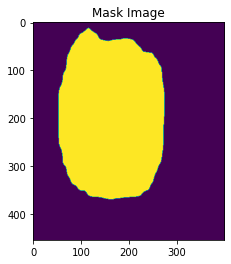

In [20]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import time
import cv2
import cv2.aruco as aruco
from matplotlib import pyplot as plt

import glob

from aidoop.mask_rcnn import model as modellib, utils
from aidoop.mask_rcnn.config import Config
from aidoop.mask_rcnn.inference import MaskRcnnDetect


COCO_WEIGHTS_PATH = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/mask_rcnn_object-train_0046.h5"

DEFAULT_LOGS_DIR = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/logs/"

INPUT_IMAGE_PATH = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/test/"

mrdetect = MaskRcnnDetect(COCO_WEIGHTS_PATH, DEFAULT_LOGS_DIR)

masks_list = list()
mask_image_list = list()

input_images = glob.glob(INPUT_IMAGE_PATH + "/*.jpg")
print(f"input_images: {input_images}")
for input_image in input_images:
    input_image_data = cv2.imread(input_image, cv2.IMREAD_UNCHANGED)
    height = input_image_data.shape[0]
    width = input_image_data.shape[1]
    print(f"input image: {input_image}, {width} x {height}")

    masks = mrdetect.detect_object_by_path(input_image)
    #masks_list.append(masks) if masks is not None else None

    mimage = mrdetect.get_mask_image(masks, width, height) 
    mask_image_list.append(mimage) if mimage is not None else None

    plt.imshow(input_image_data)
    plt.title('Input Image')
    plt.show()

    plt.imshow(mimage)
    plt.title('Mask Image')
    plt.show()


# # get width & height of input path
# input_image = cv2.imread(INPUT_IMAGE_PATH, cv2.IMREAD_UNCHANGED)
# height = input_image.shape[0]
# width = input_image.shape[1]
# print(f"input image size: {width} x {height}")


# mrdetect = MaskRcnnDetect(COCO_WEIGHTS_PATH, DEFAULT_LOGS_DIR)

# mask_list = mrdetect.detect_object_by_path(INPUT_IMAGE_PATH)

# mask_image = mrdetect.get_mask_image(mask_list, width, height)


# plt.imshow(input_image)
# plt.title('Input Image')
# plt.show()

# plt.imshow(mask_image)
# plt.title('Mask Image')
# plt.show()






In [17]:
for mask_image in mask_image_list:
    print(mask_image.shape)


(299, 400)
(900, 900)
(551, 735)
(683, 1024)
(340, 626)
(455, 400)


## 추출된 영역 확인

In [18]:
import numpy as np
import math

def get_line_length(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

threshold result: 0.0, thr_image shape: (455, 400)


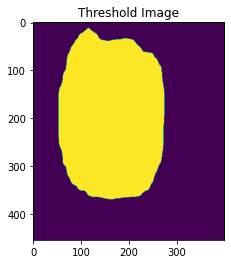

In [11]:
# ret, thr_image = cv2.threshold(mask_image, 127, 255, cv2.THRESH_OTSU)
# print(f"threshold result: {ret}, thr_image shape: {thr_image.shape}")

# plt.imshow(thr_image)
# plt.title('Threshold Image')
# plt.show()

(299, 400, 3)
((212.1139373779297, 149.56187438964844), (365.6827087402344, 276.0899963378906), 5.7545647621154785)
coordinate #1: (212.1139373779297, 149.56187438964844)
coordinate #2: (365.6827087402344, 276.0899963378906)
rotate angle: 5.7545647621154785
((202.5, 173.99998474121094), (3.4785051345825195, 10.435516357421875), 18.43494987487793)
coordinate #1: (202.5, 173.99998474121094)
coordinate #2: (3.4785051345825195, 10.435516357421875)
rotate angle: 18.43494987487793
((205.00003051757812, 169.00001525878906), (1.4142134189605713, 1.4142134189605713), 45.0)
coordinate #1: (205.00003051757812, 169.00001525878906)
coordinate #2: (1.4142134189605713, 1.4142134189605713)
rotate angle: 45.0


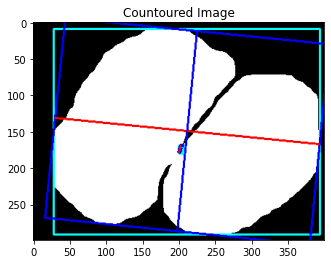

(224, 338, 3)
((145.85498046875, 92.57169342041016), (166.864013671875, 234.87393188476562), 82.9834976196289)
coordinate #1: (145.85498046875, 92.57169342041016)
coordinate #2: (166.864013671875, 234.87393188476562)
rotate angle: 82.9834976196289


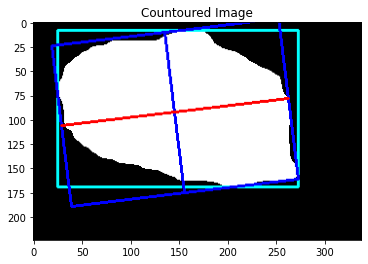

(900, 900, 3)
((451.1973876953125, 411.0625915527344), (392.3135986328125, 769.4117431640625), 0.4121927320957184)
coordinate #1: (451.1973876953125, 411.0625915527344)
coordinate #2: (392.3135986328125, 769.4117431640625)
rotate angle: 0.4121927320957184


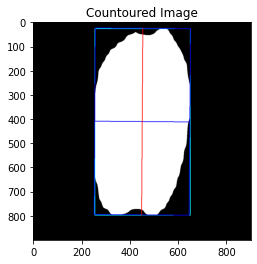

(551, 735, 3)
((224.796142578125, 223.11924743652344), (222.13783264160156, 334.25274658203125), 4.184916019439697)
coordinate #1: (224.796142578125, 223.11924743652344)
coordinate #2: (222.13783264160156, 334.25274658203125)
rotate angle: 4.184916019439697


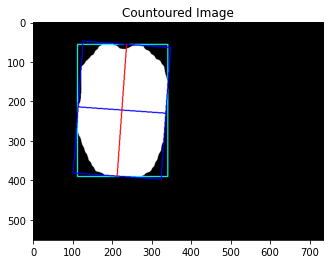

(683, 1024, 3)
((436.5, 526.0), (292.0, 333.0), 90.0)
coordinate #1: (436.5, 526.0)
coordinate #2: (292.0, 333.0)
rotate angle: 90.0
((727.1141967773438, 217.93646240234375), (456.7430419921875, 355.8967590332031), 39.09385681152344)
coordinate #1: (727.1141967773438, 217.93646240234375)
coordinate #2: (456.7430419921875, 355.8967590332031)
rotate angle: 39.09385681152344


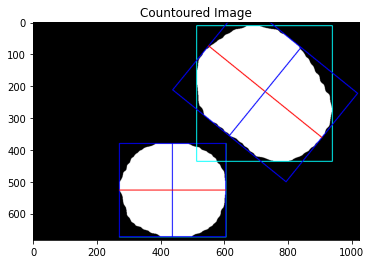

(415, 626, 3)
((317.9999694824219, 207.99996948242188), (411.99993896484375, 305.99993896484375), -0.0)
coordinate #1: (317.9999694824219, 207.99996948242188)
coordinate #2: (411.99993896484375, 305.99993896484375)
rotate angle: -0.0


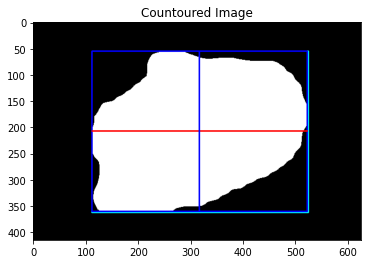

(340, 626, 3)
((57.0, 204.5), (219.0, 106.0), 90.0)
coordinate #1: (57.0, 204.5)
coordinate #2: (219.0, 106.0)
rotate angle: 90.0
((300.9553527832031, 157.5215606689453), (166.51275634765625, 223.79620361328125), 7.907163143157959)
coordinate #1: (300.9553527832031, 157.5215606689453)
coordinate #2: (166.51275634765625, 223.79620361328125)
rotate angle: 7.907163143157959


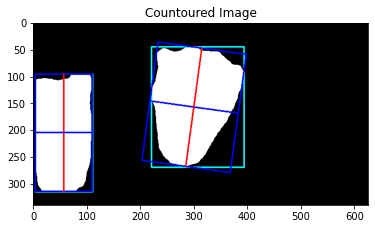

(338, 225, 3)
((103.8929443359375, 181.43496704101562), (148.57876586914062, 252.4720001220703), 7.305758953094482)
coordinate #1: (103.8929443359375, 181.43496704101562)
coordinate #2: (148.57876586914062, 252.4720001220703)
rotate angle: 7.305758953094482


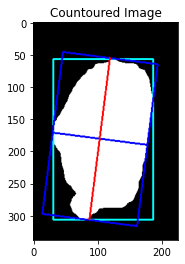

(455, 400, 3)
((163.0, 190.5), (220.0, 357.0), 0.0)
coordinate #1: (163.0, 190.5)
coordinate #2: (220.0, 357.0)
rotate angle: 0.0


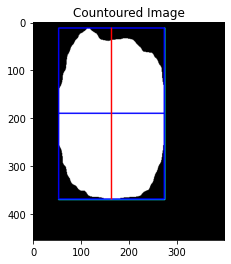

In [21]:
for mask_image in mask_image_list:
    contours,_ = cv2.findContours(mask_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2RGB)
    print(mask_image_rgb.shape)

    mask_image_copy = mask_image_rgb.copy()
    for countour in contours:
        (x,y,w,h) = cv2.boundingRect(countour)
        cv2.rectangle(mask_image_copy, (x, y), (x + w, y + h), (0, 255, 255), 2)

        rect = cv2.minAreaRect(countour)
        print(rect)
        print('coordinate #1:', rect[0])
        print('coordinate #2:', rect[1])
        print('rotate angle:', rect[2])

        # get the rectangle coordinates of RotateRect
        box = cv2.boxPoints(rect)

        # to integer
        box = np.int0(box)

        # draw box
        cv2.drawContours(mask_image_copy,[box],0,(0,0,255),2)

        # draw center line
        xx1 = np.int0((box[0][0] + box[1][0])/2)
        yy1 = np.int0((box[0][1] + box[1][1])/2)
        xx2 = np.int0((box[2][0] + box[3][0])/2)
        yy2 = np.int0((box[2][1] + box[3][1])/2)

        len1 = get_line_length(xx1, yy1, xx2, yy2)

        xx3 = np.int0((box[0][0] + box[3][0])/2)
        yy3 = np.int0((box[0][1] + box[3][1])/2)
        xx4 = np.int0((box[2][0] + box[1][0])/2)
        yy4 = np.int0((box[2][1] + box[1][1])/2)  

        len2 = get_line_length(xx3, yy3, xx4, yy4)  
        
        if(len1 >= len2):
            color1 = (255, 0, 0)
            color2 = (0, 0, 255)
        else:
            color1 = (0, 0, 255)
            color2 = (255, 0, 0)

        cv2.line(mask_image_copy, (xx1, yy1), (xx2, yy2), color1, 2)
        cv2.line(mask_image_copy, (xx3, yy3), (xx4, yy4), color2, 2)

    plt.imshow(mask_image_copy)
    plt.title('Countoured Image')
    plt.show()
